<a href="https://colab.research.google.com/github/NeryLuciano/Mackenzie/blob/main/Tarefa_Trilha_6_Linguagem_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Luciano Nery Fernandes

In [1]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction



     |████████████████████████████████| 235 kB 5.1 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [6]:
#Monta-se os dados que queremos verificar em um DataFrame Pandas
texto_verificar = np.array([
                            ("Josias de Souza", "a foto de Eduardo Bolsonaro fantasiado de sheik árabe ao lado da mulher e da filha em Dubai seria apenas um caso de exibicionismo de mau gosto. No contexto de uma comitiva oficial do Brasil a um evento internacional, a imagem é uma extravagância a serviço da desmoralização.", "Fantasia de sheik do Zero Três é extravagância a serviço da desmoralização"),
])
                            
df_ver = pd.DataFrame(data=texto_verificar, columns=["author", 'content', "title"])
df_ver.head()

,author,content,title
0,Josias de Souza,a foto de Eduardo Bolsonaro fantasiado de shei...,Fantasia de sheik do Zero Três é extravagância...


## Carregando artigos

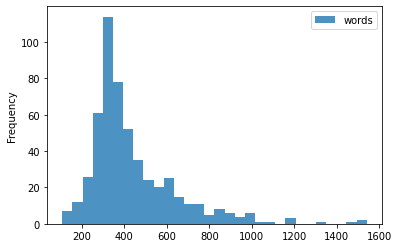

In [3]:
#Carrega o texto em um DataFrame PAndas
df_uol = pd.read_json("/content/UolBlogs.json")
df_uol = df_uol.loc[df_uol['author'] == 'Josias de Souza']

#Faz a contagem de palavras por cada linha do artigo
df_uol['words'] = df_uol['content'].str.split().str.len()

#Elimina qualquer artigo que tenha gerado menos de 100 palavras
df_uol = df_uol.loc[(df_uol['words'] > 100)]

#Plota o DataFrame em histograma para uma avaliação
df_uol.plot.hist(bins=30, alpha=0.8)



### Limpeza

In [4]:
#Elimina Stopwords e outras palavrass necessárias
stop = stopwords.words('portuguese')
stop.append('nao')
stop.append('de')
stop.append('ao')
stop.append('foi')
stop.append('dos')
stop.append('de')
stop.append('bem')
stop.append('fez')
stop.append('tudo')
stop.append('todos')
stop.append('vai')
stop.append('vez')
stop.append('nesta')
stop.append('assim')
stop.append('menos')
stop.append('ainda')
stop.append('ser')
stop.append('ter')
stop.append('dia')
stop.append('dois')
stop.append('ano')
stop.append('anos')

stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [7]:
# remoção de palavras de parada
df_uol['content_treated'] = df_uol['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
df_uol['content_treated'] = df_uol['content_treated'].str.lower().apply(lambda x: unidecode(x))
df_ver['content_treated'] = df_ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_uol['content_treated'] = df_uol['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_uol['content_treated'] = df_uol['content_treated'].str.replace('[{}]'.format(string.digits), '')
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df_uol['content_treated'] = df_uol['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))
df_ver['content_treated'] = df_ver['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1146d70750>,
      dtype=object)

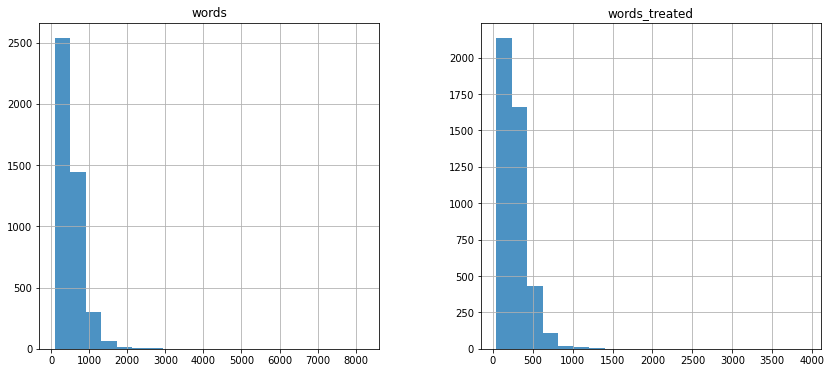

In [ ]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_uol['words_treated'] = df_uol['content_treated'].str.split().str.len()
#df_aj.plot();
df_uol.hist(bins=20, alpha=0.8, figsize=(14,6))
#df_aj.sample(10)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

#UOL
Xuol = vectorizer.fit_transform(df_uol['content_treated'])
vocabulary_uol = vectorizer.get_feature_names()
pdXuol = pd.DataFrame(data=Xuol.toarray(), columns=vocabulary_uol) #.iloc[:,0::2]

#UOL - Verificar
XVER = vectorizer.fit_transform(df_ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
len(vocabulary_uol)
df_Xuol = pdXuol.T
df_Xuol['total_uol'] = df_Xuol.sum(axis=1) 
pdXuol[['presidente', 'bolsonaro', 'pandemia', 'lava', 'cpi', 'caso', 'covid', 'ministro', 'republica', 'lula' ]]



,presidente,bolsonaro,pandemia,lava,cpi,caso,covid,ministro,republica,lula
0,2,3,0,0,0,1,0,0,0,0
1,1,4,1,0,0,0,0,0,1,4
2,1,10,0,0,0,0,0,0,0,0
3,0,9,0,1,0,2,0,1,0,0
4,3,8,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
524,6,10,1,0,0,0,1,1,5,1
525,3,6,3,0,0,0,0,0,0,0
526,2,2,1,0,0,1,0,0,1,0
527,3,4,2,0,0,1,0,0,4,0


In [10]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_Xuol = pdXuol.T

#Calcula a quantidade de vezes que cada palavra é utilizada
df_Xuol['total_uol'] = df_Xuol.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_Xuol.drop(df_Xuol.columns[0:len(df_uol['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_Xuol = df_Xuol.sort_values(by='total_uol', ascending=False)

#Gera a tabela
df_Xuol.head(50)

,total_uol
bolsonaro,2837
presidente,1356
cpi,787
ministro,660
governo,618
supremo,600
brasil,556
sobre,481
contra,472
saude,464


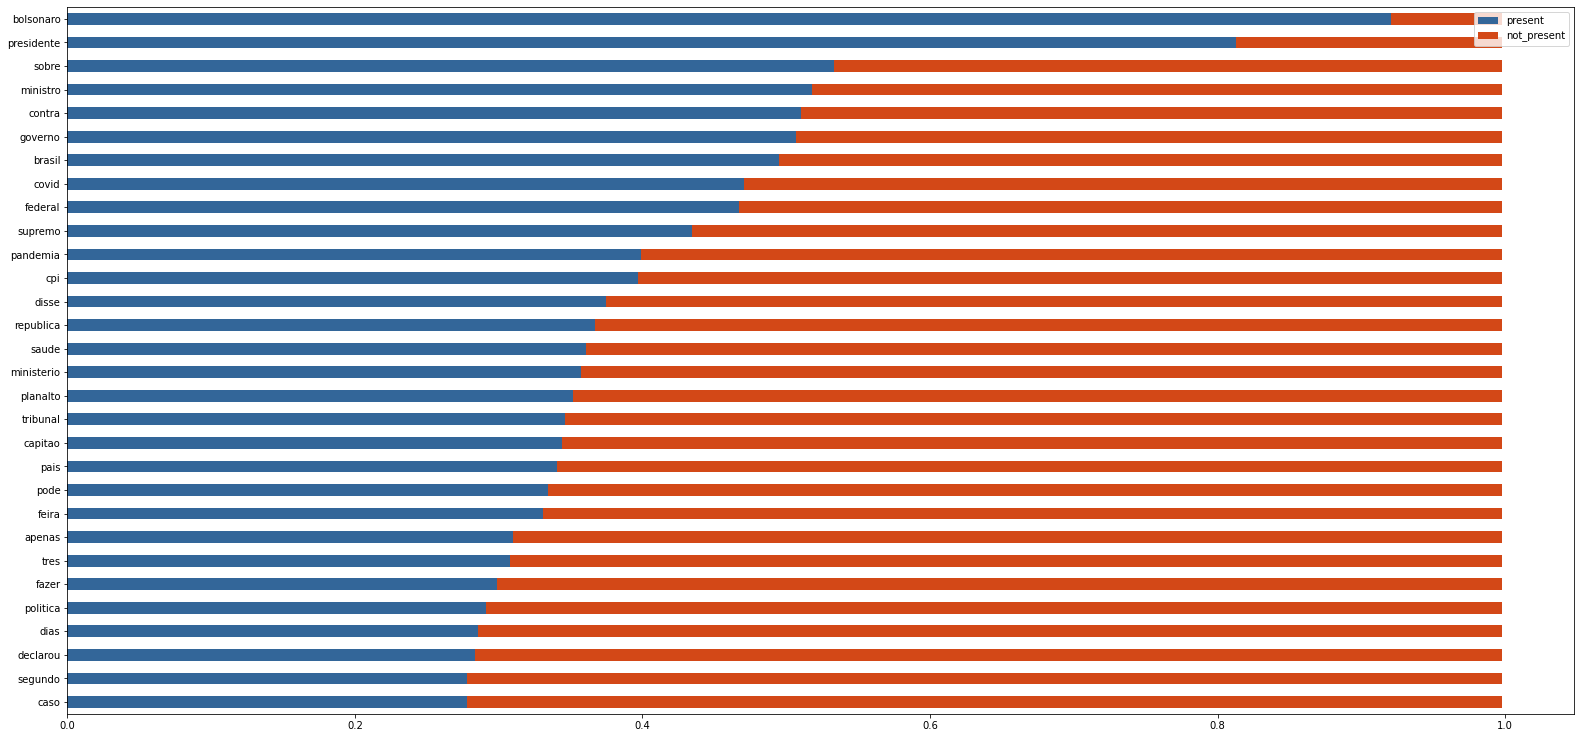

In [11]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXuolT = pdXuol.T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXuolT['present'] = (pdXuolT.ne(0).sum(axis=1) -1) / len(df_uol['content'])
pdXuolT['not_present'] = pdXuolT.eq(0).sum(axis=1) / len(df_uol['content'])

#REmove as colunas individuais de cada documento para gerar o grafico
pdXuolT.drop(pdXuolT.columns[0:len(df_uol['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXuolT = pdXuolT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXuolT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [12]:
pdXuolT.tail(30)

,present,not_present
caso,0.277883,0.720227
segundo,0.277883,0.720227
declarou,0.283554,0.714556
dias,0.285444,0.712665
politica,0.291115,0.706994
fazer,0.298677,0.699433
tres,0.308129,0.689981
apenas,0.310019,0.688091
feira,0.330813,0.667297
pode,0.334594,0.663516


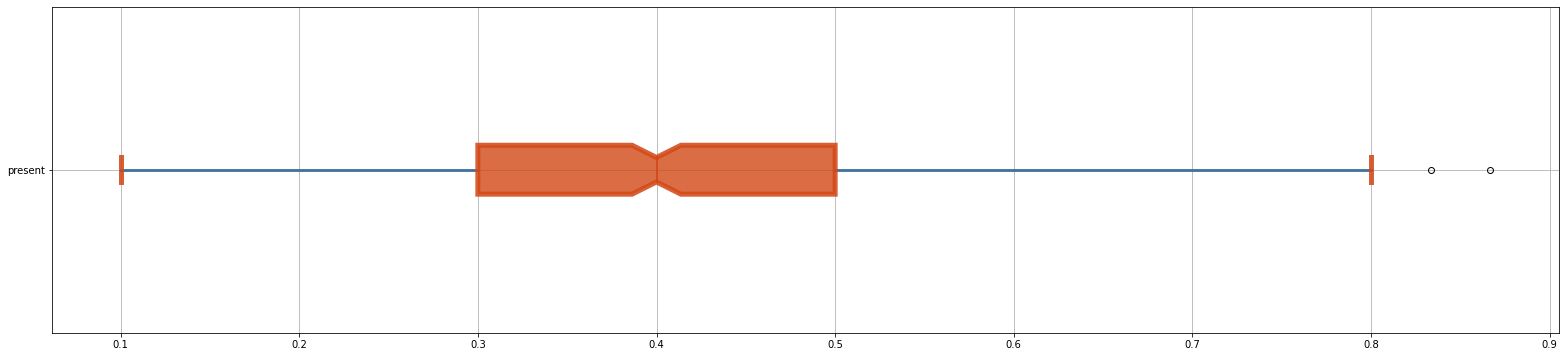

In [13]:
#Reinicia a matriz transposta
pdXuolT = pdXuol.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXuolT['present'] = (pdXuolT.ne(0).sum(axis=1) -1) / len(df_uol['content'])
pdXuolT = pdXuolT.sort_values(by='present', ascending=False)
pdXuolT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXuolT.head(30).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXuolT = pdXuolT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXuolT['present'] = (pdXuolT.ne(0).sum(axis=1)) / 30

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXuolT.drop(pdXuolT.columns[0:30], axis=1, inplace=True)

#Gera o gráfico de boxplor 
pdXuolT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)


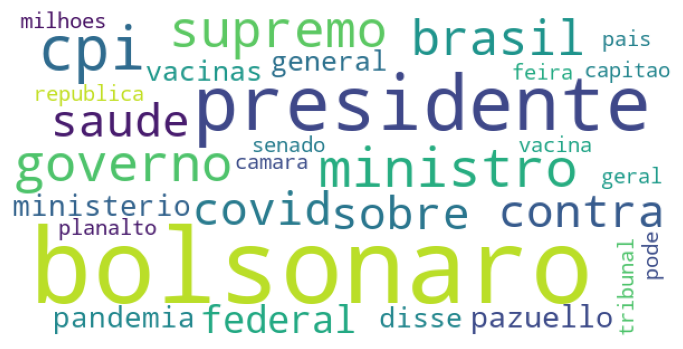

In [14]:
# Gerando um saco de palavras com as palavras de maior relevância

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

saco_palavras = ' '.join(df_uol['content_treated'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(saco_palavras)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [15]:
#Limpeza do saco de palavras gerado

ignorewords = [ 'ser', 'pode', 'ano', 'ter', 'vai', 'hoje', 'segundo', 'feira']

df_uol['content_ignored'] = df_uol['content_treated'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (ignorewords)]))

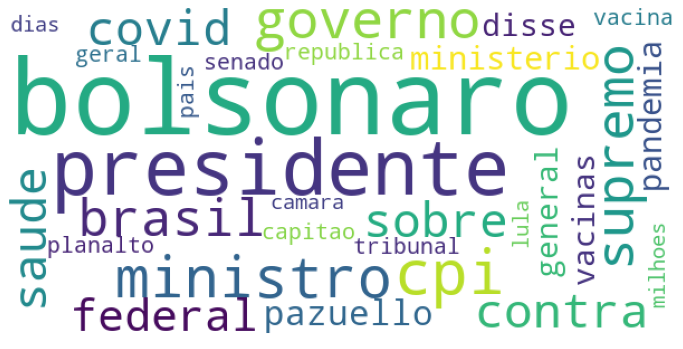

In [16]:
# Plotando novo saco de palavras após llimpeza 

saco_palavras2 = ' '.join(df_uol['content_ignored'])

wordcloud2 = WordCloud(collocations=False, normalize_plurals=False, stopwords=None, width=600, height=300, background_color='white', max_words=30).generate(saco_palavras2)
# Generate plot
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = 'White') 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()